In [6]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder, MinMaxScaler
import pandas as pd
import tensorflow as tf
import numpy as np

# Import our input dataset
df = pd.read_csv('../pitcher_salaries_cleaned.csv')
df.head()

,Year,Full Name,Age,Salary,ERA,Hits,Earned Runs,Strike Outs,Home Runs,Wins,Losses,Outs Pitched,Batters Faced by Pitcher,Games Finished,Weight,Height,League,Team,Games Started
0,1990,AbbottJim,23,185000,4.51,246,106,105,16,10,14,635,925,0,200,75,AL,CAL,33
1,1990,AbbottPaul,23,100000,5.97,37,23,25,0,0,5,104,162,0,185,75,AL,MIN,7
2,1990,AldredScott,22,100000,3.77,13,6,7,0,1,2,43,63,0,195,76,AL,DET,3
3,1990,AndersonAllan,26,300000,4.53,214,95,82,20,7,18,566,797,0,178,71,AL,MIN,31
4,1990,AppierKevin,23,100000,2.76,179,57,127,13,12,8,557,784,1,180,74,AL,KCA,24


### Create Salary Brackets
---

In [10]:
# look at distribution of salaries (suppressing scientific notation)
df['Salary'].describe().apply(lambda x: format(x, 'f'))

count        4937.000000
mean      3011304.443387
std       4265619.190449
min        100000.000000
25%        327000.000000
50%        980000.000000
75%       4000000.000000
max      33000000.000000
Name: Salary, dtype: object

In [24]:
# create salary brackets and labels
bins = [0, 499999, 4999999, 9999999, 34999999]
labels = ['low', 'mid', 'high', 'top']

In [32]:
# apply salary brackets
df['Salary Bin'] = pd.cut(df['Salary'], bins=bins, labels=labels)
df

,Year,Full Name,Age,Salary,ERA,Hits,Earned Runs,Strike Outs,Home Runs,Wins,Losses,Outs Pitched,Batters Faced by Pitcher,Games Finished,Weight,Height,League,Team,Games Started,Salary Bin
0,1990,AbbottJim,23,185000,4.51,246,106,105,16,10,14,635,925,0,200,75,AL,CAL,33,low
1,1990,AbbottPaul,23,100000,5.97,37,23,25,0,0,5,104,162,0,185,75,AL,MIN,7,low
2,1990,AldredScott,22,100000,3.77,13,6,7,0,1,2,43,63,0,195,76,AL,DET,3,low
3,1990,AndersonAllan,26,300000,4.53,214,95,82,20,7,18,566,797,0,178,71,AL,MIN,31,low
4,1990,AppierKevin,23,100000,2.76,179,57,127,13,12,8,557,784,1,180,74,AL,KCA,24,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4932,2016,WorleyVance,29,2600000,3.53,84,34,56,11,2,2,260,365,13,240,74,AL,BAL,4,mid
4933,2016,WrightMike,26,510500,5.79,81,48,50,12,3,4,224,328,5,240,78,AL,BAL,12,mid
4934,2016,WrightSteven,32,514500,3.33,138,58,127,12,13,6,470,656,0,215,74,AL,BOS,24,mid
4935,2016,YoungChris,37,4250000,6.19,104,61,94,28,3,9,266,406,7,255,82,AL,KCA,13,mid


### Encode Salary Bins column
---

In [39]:
# encode object features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded_df = df.copy()
df['Salary Bin'] = le.fit_transform(df['Salary Bin'])

df.head()

,ERA,Hits,Earned Runs,Strike Outs,Home Runs,Wins,Losses,Outs Pitched,Batters Faced by Pitcher,Games Finished,Weight,Height,Games Started,Salary Bin
0,4.51,246,106,105,16,10,14,635,925,0,200,75,33,1
1,5.97,37,23,25,0,0,5,104,162,0,185,75,7,1
2,3.77,13,6,7,0,1,2,43,63,0,195,76,3,1
3,4.53,214,95,82,20,7,18,566,797,0,178,71,31,1
4,2.76,179,57,127,13,12,8,557,784,1,180,74,24,1


In [33]:
# drop unnecessary columns
df= df.drop(["Full Name","Team","League","Age","Year","Salary"],1)
df.head()

C:\Users\alyss\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,ERA,Hits,Earned Runs,Strike Outs,Home Runs,Wins,Losses,Outs Pitched,Batters Faced by Pitcher,Games Finished,Weight,Height,Games Started,Salary Bin
0,4.51,246,106,105,16,10,14,635,925,0,200,75,33,low
1,5.97,37,23,25,0,0,5,104,162,0,185,75,7,low
2,3.77,13,6,7,0,1,2,43,63,0,195,76,3,low
3,4.53,214,95,82,20,7,18,566,797,0,178,71,31,low
4,2.76,179,57,127,13,12,8,557,784,1,180,74,24,low


### Split Features/Target & Training/Testing Sets
---
Split into features and target
- **y variable**: Our target variable, `Salary`
- **X variable**: Our features; just drop `Salary` and `Full Name`

In [40]:
# Split our preprocessed data into our features and target arrays
y = df["Salary Bin"].values
X = df.drop(["Salary Bin"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

C:\Users\alyss\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


### Build and Instantiate `StandardScaler` object, then standardize numerical features
---

In [41]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Build Neural Net Framework
--- 


HL1:
- 64 neurons
- activation fxn: `relu`<br>

HL2:
- 32 neurons
- activation fxn: `relu`<br>

HL3:
- 16 neurons
- activation fxn: `relu`<br>

output layer:
- 1 neurons
- activation fxn: `softmax`
    - suggested for multiclass classification problems per (https://machinelearningmastery.com/loss-and-loss-functions-for-training-deep-learning-neural-networks/)

In [87]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 20
hidden_nodes_layer2 = 20
hidden_nodes_layer3 = 20


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=4, activation="softmax"))

# Check the structure of the model
nn.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 20)                280       
                                                                 
 dense_49 (Dense)            (None, 20)                420       
                                                                 
 dense_50 (Dense)            (None, 20)                420       
                                                                 
 dense_51 (Dense)            (None, 4)                 84        
                                                                 
Total params: 1,204
Trainable params: 1,204
Non-trainable params: 0
_________________________________________________________________


### Compile the Model
---

- loss function: `CategoricalCrossentropy`
    - suggested from website (https://machinelearningmastery.com/loss-and-loss-functions-for-training-deep-learning-neural-networks/) as good for multi-class classification problems

In [88]:
# Compile the model
nn.compile(loss="CategoricalCrossentropy", optimizer="adam", metrics=["accuracy"])

### Train the model
---

In [89]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=200)

Epoch 1/200


ValueError: in user code:

    File "C:\Users\alyss\anaconda3\envs\mlenv\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\alyss\anaconda3\envs\mlenv\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\alyss\anaconda3\envs\mlenv\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\alyss\anaconda3\envs\mlenv\lib\site-packages\keras\engine\training.py", line 860, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\alyss\anaconda3\envs\mlenv\lib\site-packages\keras\engine\training.py", line 919, in compute_loss
        y, y_pred, sample_weight, regularization_losses=self.losses)
    File "C:\Users\alyss\anaconda3\envs\mlenv\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\alyss\anaconda3\envs\mlenv\lib\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\alyss\anaconda3\envs\mlenv\lib\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\alyss\anaconda3\envs\mlenv\lib\site-packages\keras\losses.py", line 1790, in categorical_crossentropy
        y_true, y_pred, from_logits=from_logits, axis=axis)
    File "C:\Users\alyss\anaconda3\envs\mlenv\lib\site-packages\keras\backend.py", line 5083, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 4) are incompatible


In [75]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss*100:.2f}%, Accuracy: {model_accuracy*100:.2f}%")

39/39 - 0s - loss: 0.0000e+00 - accuracy: 0.3887 - 92ms/epoch - 2ms/step
Loss: 0.00%, Accuracy: 38.87%


<AxesSubplot:>

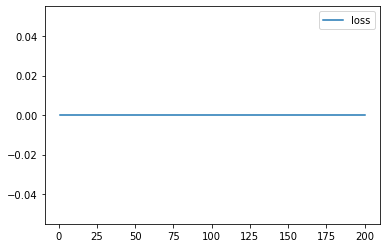

In [76]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

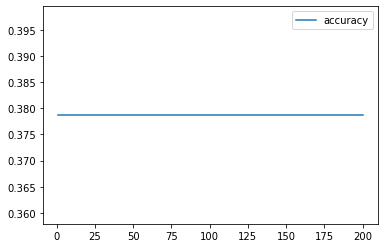

In [77]:
# Plot the accuracy
history_df.plot(y="accuracy")